In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

In [2]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [3]:
import os

image_datasets = {x: datasets.ImageFolder(os.path.join("", x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=60, shuffle=True) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [4]:
# model = models.mobilenet_v2(pretrained=True)
# num_features = model.classifier[1].in_features
# model.classifier[1] = nn.Linear(num_features, len(class_names))

In [5]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
train_loss_arr = []
train_accuracy_arr = []
valid_loss_arr = []
valid_accuracy_arr = []

def train_model(model, criterion, optimizer, device, num_epochs=10):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                 
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            if phase == "train":  
                train_loss_arr.append(epoch_loss)
                train_accuracy_arr.append(epoch_acc.cpu().numpy())
            if phase == "valid":  
                valid_loss_arr.append(epoch_loss)
                valid_accuracy_arr.append(epoch_acc.cpu().numpy())
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    return model

In [7]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)
# model = train_model(model, criterion, optimizer, device, num_epochs=10)

In [8]:
model = models.mobilenet_v2(pretrained=False)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(class_names))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

C:\Users\dared\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\dared\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model = train_model(model, criterion, optimizer, device)

Epoch 1/10
----------
train Loss: 1.6192 Acc: 0.4277
valid Loss: 1.4311 Acc: 0.5498
Epoch 2/10
----------
train Loss: 1.1086 Acc: 0.6176
valid Loss: 0.9895 Acc: 0.6850
Epoch 3/10
----------
train Loss: 0.8984 Acc: 0.6890
valid Loss: 0.8794 Acc: 0.7079
Epoch 4/10
----------
train Loss: 0.7968 Acc: 0.7231
valid Loss: 0.7031 Acc: 0.7449
Epoch 5/10
----------
train Loss: 0.7123 Acc: 0.7510
valid Loss: 0.6049 Acc: 0.7943
Epoch 6/10
----------
train Loss: 0.6544 Acc: 0.7753
valid Loss: 0.4263 Acc: 0.8537
Epoch 7/10
----------
train Loss: 0.5997 Acc: 0.7910
valid Loss: 0.4592 Acc: 0.8403
Epoch 8/10
----------
train Loss: 0.5694 Acc: 0.7993
valid Loss: 0.4733 Acc: 0.8388
Epoch 9/10
----------
train Loss: 0.5399 Acc: 0.8132
valid Loss: 0.3529 Acc: 0.8773
Epoch 10/10
----------
train Loss: 0.5040 Acc: 0.8238
valid Loss: 0.3723 Acc: 0.8712


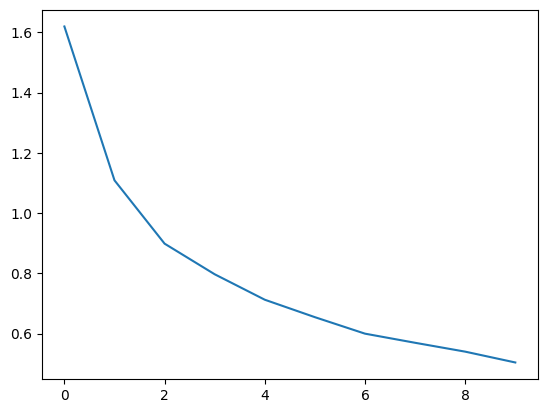

In [10]:
import matplotlib.pyplot as plt

# plt.plot(loss_arr)
# new_acc = [x.cpu().numpy() for x in train_loss_arr]

# plt.plot(new_acc)
plt.plot(train_loss_arr)
# train_accuracy_arr

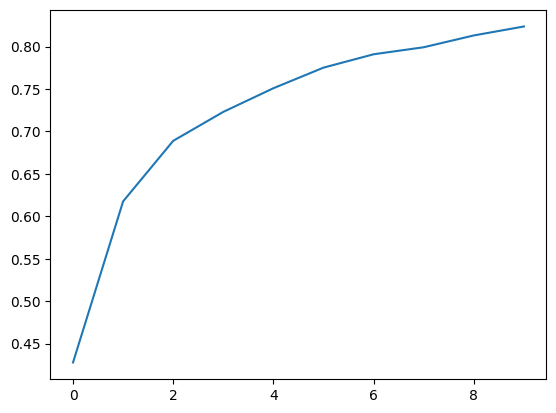

In [11]:
plt.plot(train_accuracy_arr)

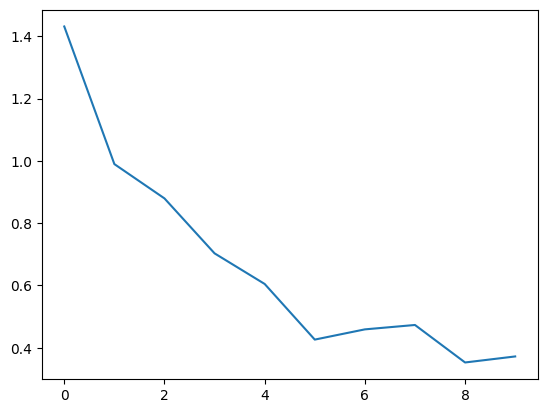

In [12]:
plt.plot(valid_loss_arr)

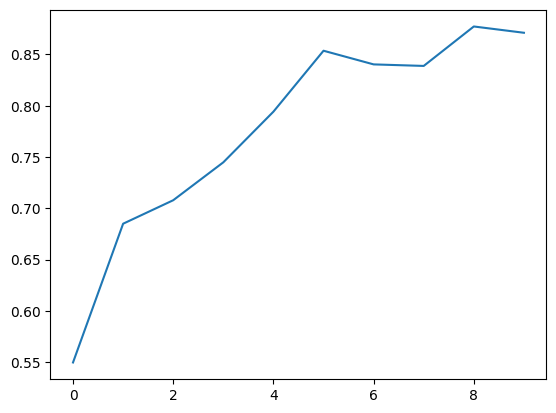

In [13]:
plt.plot(valid_accuracy_arr)

In [14]:
train_loss_arr

[1.6192303274261513,
 1.1085688906053905,
 0.8984101679405536,
 0.7967648748383364,
 0.7122729977230212,
 0.6543758519106847,
 0.5996533878002326,
 0.569354449391033,
 0.5399336930363218,
 0.5039987842371058]

In [15]:
train_accuracy_arr

[array(0.42769266),
 array(0.61764933),
 array(0.68898948),
 array(0.72311204),
 array(0.75100588),
 array(0.77526308),
 array(0.79100898),
 array(0.79928815),
 array(0.81321572),
 array(0.82377747)]

In [16]:
valid_accuracy_arr

[array(0.5497531),
 array(0.6850217),
 array(0.70791561),
 array(0.74487506),
 array(0.79425408),
 array(0.85365854),
 array(0.84034116),
 array(0.83884483),
 array(0.87730061),
 array(0.87116564)]

In [17]:
valid_loss_arr

[1.4311106026252907,
 0.9895354098284046,
 0.8793923508865862,
 0.7030651650438761,
 0.6048706714713287,
 0.4263315870165022,
 0.4591673319298369,
 0.4732671527872895,
 0.3529345633365358,
 0.3722817008944484]

In [22]:

from sklearn.metrics import confusion_matrix
def get_true_predicted_labels(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    true_labels = []
    predicted_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())
    return true_labels, predicted_labels
true_labels, predicted_labels = get_true_predicted_labels(model, dataloaders['valid'])


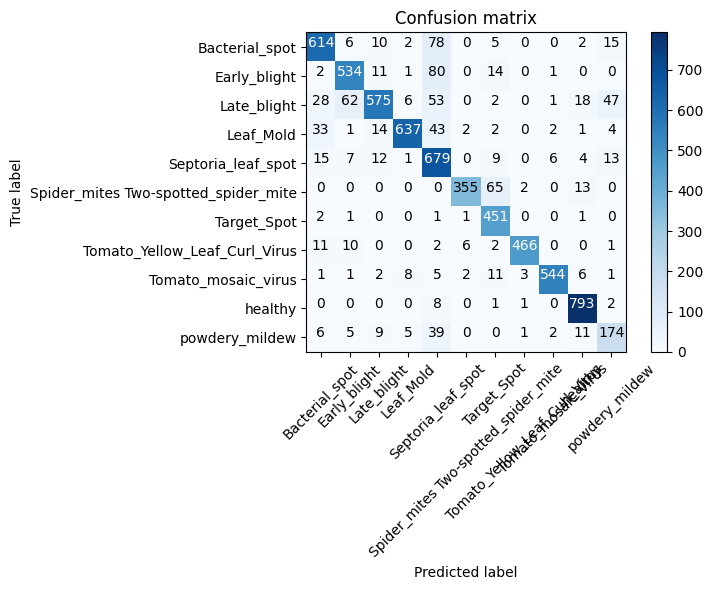

In [24]:
import numpy as np
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes = image_datasets['valid'].classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add numerical values in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()